In [38]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skfold = StratifiedKFold(n_splits=5, random_state=8, shuffle=True)

model = DecisionTreeClassifier()
result = cross_val_score(model, x, y,  cv=skfold)
result.mean()

0.9666666666666668

Acurácia do modelo nos dados de teste: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



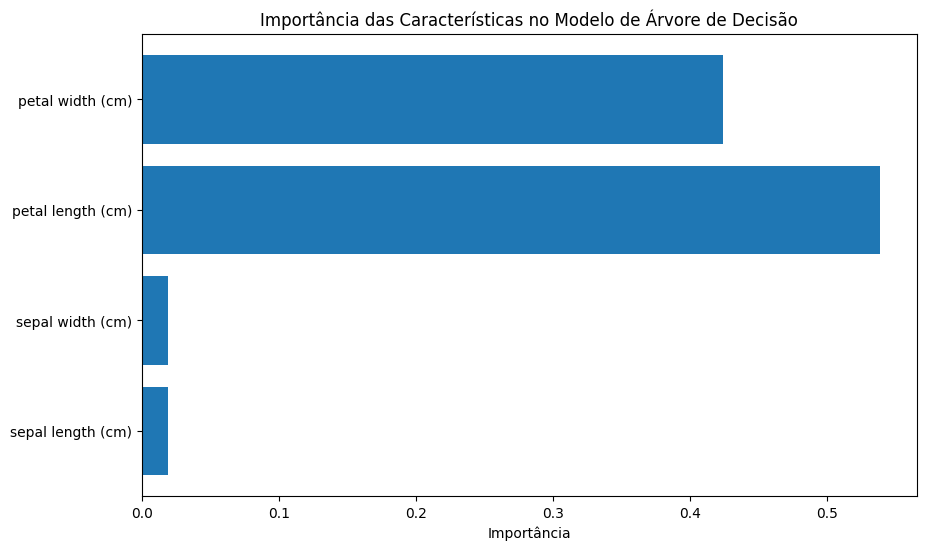

In [41]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

model.fit(x_train, y_train)

# Fazendo previsões sobre o conjunto de teste
y_pred = model.predict(x_test)

# Avaliando a acurácia do modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo nos dados de teste: {accuracy:.2f}")

# Exibindo as métricas de classificação (precisão, recall, f1-score)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Mostrando a importância das características
importances = model.feature_importances_
feature_names = x.columns

# Plotando a importância das características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.title('Importância das Características no Modelo de Árvore de Decisão')
plt.show()